<a href="https://colab.research.google.com/github/scottspurlock/csc4422-s2024/blob/main/demos/day11_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DMML Day 11 Demo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

file_link = 'https://drive.google.com/uc?export=download&id=1UZTj2GjSTFiBqAeOXiroTxviy_zLxLpL'
df = pd.read_csv(file_link)

# Separate out the data (X) and labels (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['class']
X


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=13)

from sklearn.ensemble import RandomForestClassifier

# n_estimators: how many trees in the forest
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(Xtrain, ytrain)

# See which features are most important after training
model.feature_importances_


array([0.09631823, 0.02441063, 0.45728901, 0.42198213])

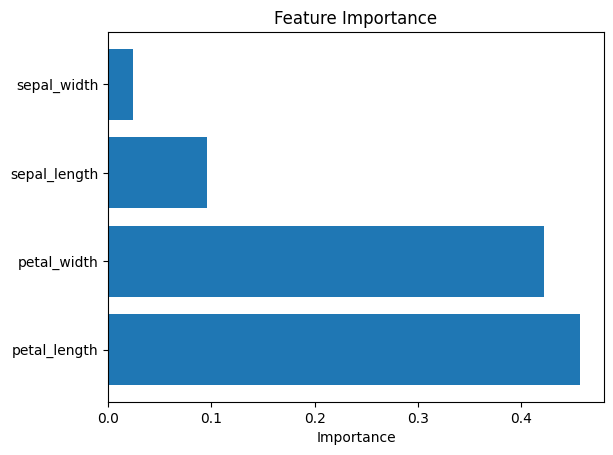

In [ ]:
# Make a DataFrame for ease of sorting and visualization
feat_imp = pd.DataFrame({'Feature': X.columns,
                      'Importance': model.feature_importances_})
feat_imp
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

fig, ax = plt.subplots()

# horizontal bar charts can make text easier to read
ax.barh(feat_imp['Feature'], feat_imp['Importance'])
ax.set_xlabel('Importance')
ax.set_title('Feature Importance');


In [ ]:
from sklearn.metrics import accuracy_score

ypred = model.predict(Xtest)

accuracy = accuracy_score(ytest, ypred)
accuracy



1.0

In [ ]:
from sklearn.model_selection import validation_curve

# Make an array to hold the values to try
trees = np.arange(1, 40) # np.arange(1, 200, 20)

train_scores, valid_scores = validation_curve(
    RandomForestClassifier(), Xtrain, ytrain,
    param_name="n_estimators", param_range=trees, cv=5)

# average score on validation set (across the 5 cross validation trials)
valid_scores.mean(axis=1)



array([0.94664032, 0.93754941, 0.93794466, 0.94703557, 0.94664032,
       0.92924901, 0.94703557, 0.93794466, 0.93794466, 0.94703557,
       0.93754941, 0.94664032, 0.92885375, 0.94703557, 0.93794466,
       0.94664032, 0.94664032, 0.93794466, 0.92885375, 0.92885375,
       0.94664032, 0.93794466, 0.93794466, 0.93794466, 0.95573123,
       0.93794466, 0.93794466, 0.95573123, 0.93794466, 0.93794466,
       0.93794466, 0.93794466, 0.93794466, 0.93794466, 0.94664032,
       0.93794466, 0.94703557, 0.93794466, 0.94664032])

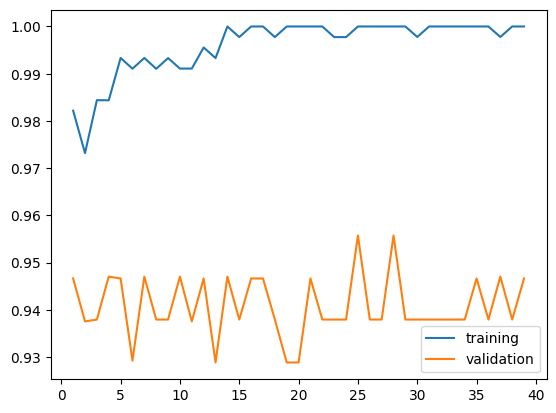

In [ ]:
plt.plot(trees, train_scores.mean(axis=1), label='training')
plt.plot(trees, valid_scores.mean(axis=1), label='validation')
plt.legend()
